<a href="https://colab.research.google.com/github/rupak1510/concrete-compressive-strength/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)


x= concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets



In [ ]:
x.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
x.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [ ]:
y.describe()

,Concrete compressive strength
count,1030.000000
mean,35.817961
std,16.705742
min,2.330000
25%,23.710000
50%,34.445000
75%,46.135000
max,82.600000


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Concrete compressive strength  1030 non-null   float64
dtypes: float64(1)
memory usage: 8.2 KB


In [ ]:
y.head()

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =42)

In [ ]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
196,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,28
631,325.0,0.0,0.0,184.0,0.0,1063.0,783.0,7
81,318.8,212.5,0.0,155.7,14.3,852.1,880.4,3
526,359.0,19.0,141.0,154.0,10.9,942.0,801.0,3
830,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28


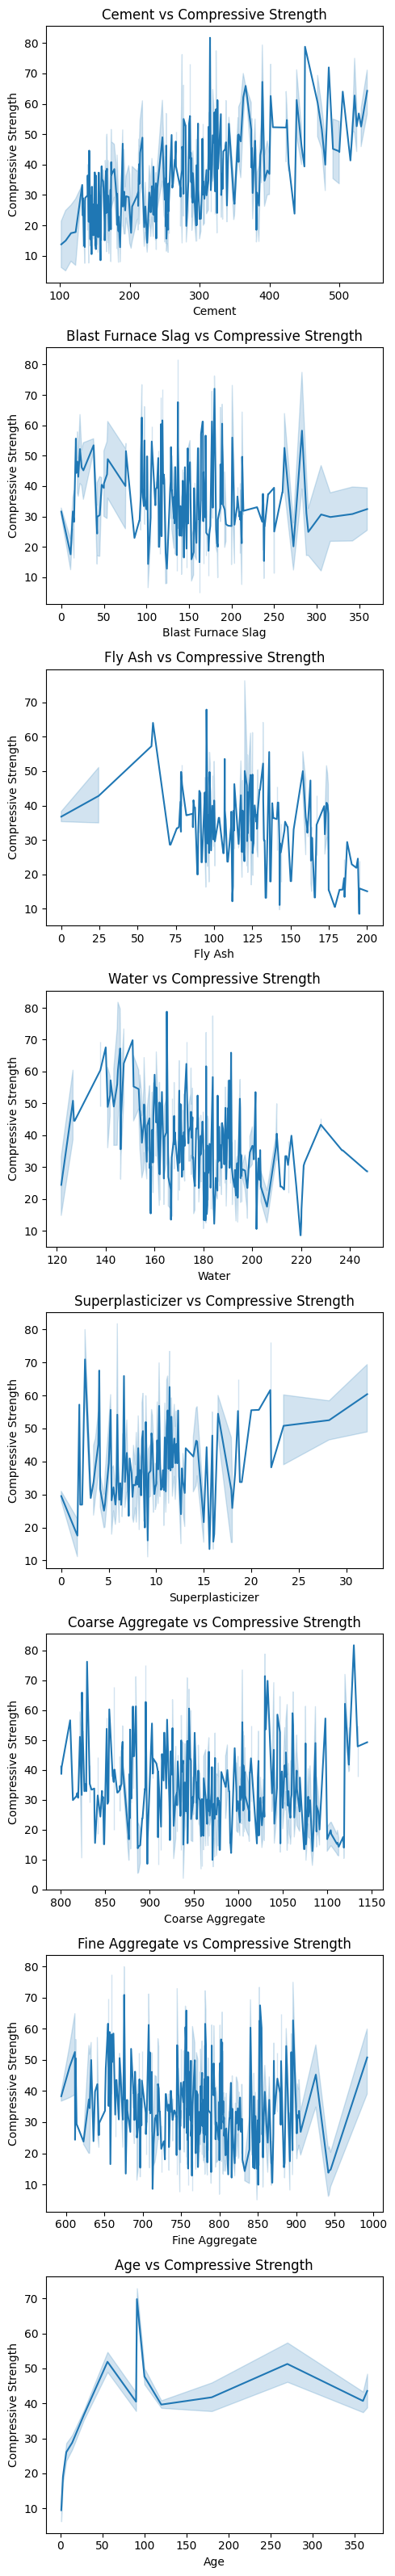

In [ ]:
X_df = pd.DataFrame(x, columns=concrete_compressive_strength.feature_names)
X_df['Compressive Strength'] = y


num_features = len(X_df.columns) - 1
plt.figure(figsize=(5, num_features * 4))

for i, feature in enumerate(X_df.columns[:-1]):
    plt.subplot(num_features, 1, i + 1)
    sns.lineplot(x=X_df[feature], y=X_df['Compressive Strength'])
    plt.title(f'{feature} vs Compressive Strength')
    plt.xlabel(feature)
    plt.ylabel('Compressive Strength')

plt.tight_layout()
plt.show()

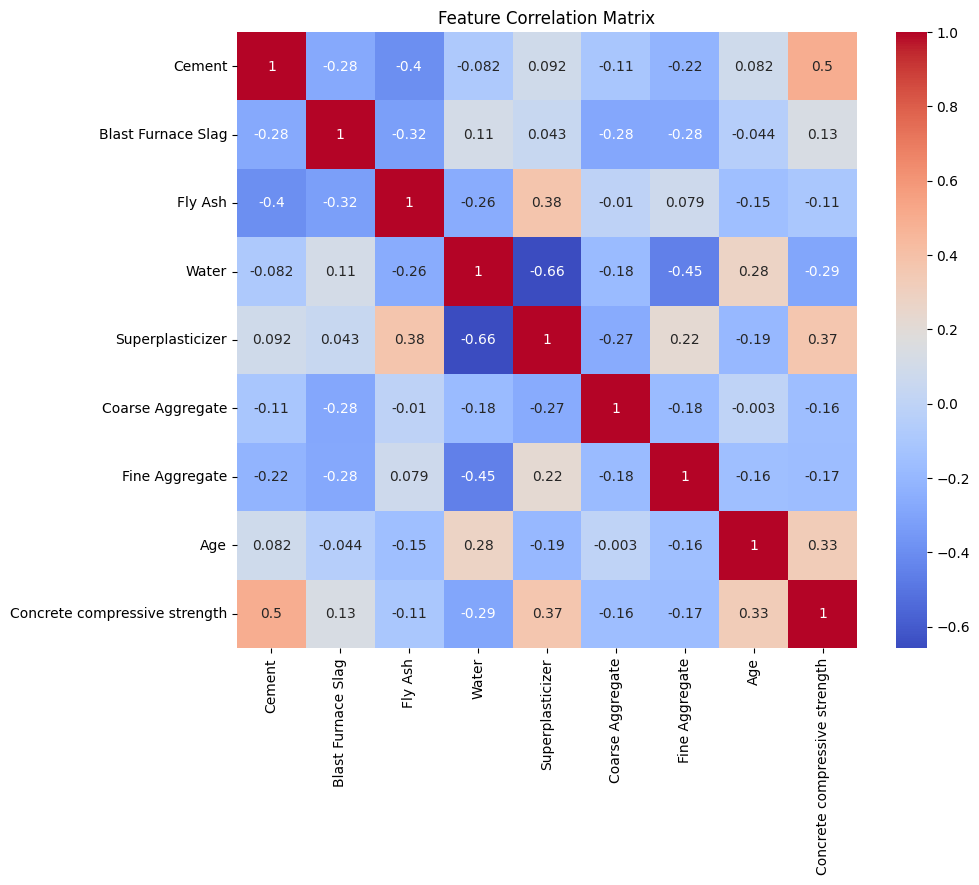

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.concat([x, y], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
data = pd.concat([x.reset_index(drop =True),y.reset_index(drop =True)],axis=1)

In [ ]:
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:

prediction = model.predict(X_poly_test)

In [ ]:
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test,prediction)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 37.12363714520995
R-squared: 0.8627968666401707


In [ ]:
print('predicted value:',prediction[5])
print('actual value of',y_test.iloc[5])

predicted value: [44.75352265]
actual value of Concrete compressive strength    44.28
Name: 1025, dtype: float64


In [ ]:
for i in range(len(y_test)):
  print(i,'prediction : ',prediction[i] ,'actual value :',y_test.iloc[i].values)

0 prediction :  [59.09843654] actual value : [52.91]
1 prediction :  [44.54275824] actual value : [55.9]
2 prediction :  [70.56428293] actual value : [74.5]
3 prediction :  [40.82886486] actual value : [35.3]
4 prediction :  [10.44086456] actual value : [10.54]
5 prediction :  [44.75352265] actual value : [44.28]
6 prediction :  [28.75251444] actual value : [23.69]
7 prediction :  [54.83890392] actual value : [45.37]
8 prediction :  [33.61757613] actual value : [37.4]
9 prediction :  [46.90436199] actual value : [48.85]
10 prediction :  [46.10583588] actual value : [25.1]
11 prediction :  [13.48779625] actual value : [10.73]
12 prediction :  [43.92260844] actual value : [40.2]
13 prediction :  [54.31549798] actual value : [49.8]
14 prediction :  [27.61809057] actual value : [33.01]
15 prediction :  [24.8599197] actual value : [21.92]
16 prediction :  [38.47457232] actual value : [40.06]
17 prediction :  [19.79773008] actual value : [19.35]
18 prediction :  [34.51177723] actual value : 

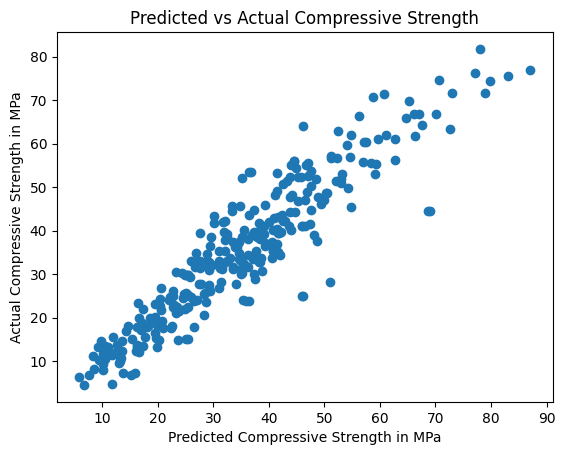

In [ ]:
plt.scatter(prediction, y_test)

plt.ylabel('Actual Compressive Strength in MPa')
plt.xlabel('Predicted Compressive Strength in MPa')
plt.title('Predicted vs Actual Compressive Strength')
plt.show()